# Content-based recommender system using book description and book categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### use code from other notebooks to load data

In [5]:
ratings = pd.read_csv('book_ratings.csv')
history = pd.read_csv('book_history.csv')
items = pd.read_csv('items_info.csv')
users = pd.read_csv('users_info.csv')

# 🔍 Step 1: Clean Ratings
ratings.drop_duplicates(inplace=True)
ratings = ratings.dropna(subset=['user', 'item', 'rating'])

# 🔍 Step 2: Clean History
history.drop_duplicates(inplace=True)
history = history.dropna(subset=['user', 'item', 'accessed'])

# 🔍 Step 3: Clean Items
items.drop_duplicates(subset=['Book_ID', 'ISBN'], inplace=True)

# Fix types
items['Year-Of-Publication'] = pd.to_numeric(items['Year-Of-Publication'], errors='coerce')
items['Year-Of-Publication'] = items['Year-Of-Publication'].fillna(0).astype(int)
items['Publisher'] = items['Publisher'].fillna('Unknown')
items['Book-Title'] = items['Book-Title'].fillna('Unknown')
items['Book-Author'] = items['Book-Author'].fillna('Unknown')

# 🔍 Step 4: Clean Users
users.drop_duplicates(inplace=True)
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')
users.loc[(users['Age'] < 10) | (users['Age'] > 90), 'Age'] = np.nan

In [38]:
# Create user-item rating matrix (users as rows, items as columns)
user_item_matrix = ratings.pivot(index='user', columns='item', values='rating')

In [40]:
# fill missing ratings with 0
filled_matrix = user_item_matrix.fillna(0)

In [8]:
book_info = pd.read_csv("books_info_updated.csv")

In [10]:
book_info.head()

,ISBN,Title,Description,Category
0,0060973129,Decision in Normandy,No description available,"['Normandy (France)', 'France', 'Campaigns', '..."
1,0393045218,The mummies of Ürümchi,"In the museums of Urumchi, the wind-swept regi...","['China', 'Antiquities', 'Mummies', 'Bronze ag..."
2,0425176428,What if?,No description available,"['Imaginary wars and battles.', 'Imaginary his..."
3,0452264464,Beloved,No description available,"['African American History', 'Ohio', 'History'..."
4,0609804618,Our dumb century,No description available,"['American wit and humor', 'Headlines', 'Humor..."


In [12]:
items.head()

,Book_ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
1,3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
2,4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
3,5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...
4,7,1879384493,If I'd Known Then What I Know Now: Why Not Lea...,J. R. Parrish,2003,Cypress House,http://images.amazon.com/images/P/1879384493.0...,http://images.amazon.com/images/P/1879384493.0...,http://images.amazon.com/images/P/1879384493.0...


In [16]:
book_info.shape

(17347, 4)

In [18]:
items.shape

(16411, 9)

#### book info and items don't have the same shape, merge two df based on ISBN

In [20]:
merged_book_info = pd.merge(items, book_info, on = "ISBN")

In [22]:
merged_book_info.shape

(16378, 12)

In [24]:
merged_book_info.head()

,Book_ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Title,Description,Category
0,1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,Decision in Normandy,No description available,"['Normandy (France)', 'France', 'Campaigns', '..."
1,3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,What if?,No description available,"['Imaginary wars and battles.', 'Imaginary his..."
2,4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,Beloved,No description available,"['African American History', 'Ohio', 'History'..."
3,5,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,Our dumb century,No description available,"['American wit and humor', 'Headlines', 'Humor..."
4,7,1879384493,If I'd Known Then What I Know Now: Why Not Lea...,J. R. Parrish,2003,Cypress House,http://images.amazon.com/images/P/1879384493.0...,http://images.amazon.com/images/P/1879384493.0...,http://images.amazon.com/images/P/1879384493.0...,If I'd Known Then What I Know Now: Why Not Lea...,No description available,"['Personal Growth - General', 'Personal & Prac..."


In [28]:
# drop title since book-title already exists
merged_book_info = merged_book_info.drop("Title", axis = 1)

In [34]:
# create new df with just book id, book-title, book-author, year
book_info_base = merged_book_info[["Book_ID", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"]]
# create a separate df with book id and description
book_description = merged_book_info[["Book_ID", "Description"]]
# create a separate df with book id and category
book_category = merged_book_info[["Book_ID", "Category"]]

In [48]:
book_category.head()

,Book_ID,Category
0,1,"['Normandy (France)', 'France', 'Campaigns', '..."
1,3,"['Imaginary wars and battles.', 'Imaginary his..."
2,4,"['African American History', 'Ohio', 'History'..."
3,5,"['American wit and humor', 'Headlines', 'Humor..."
4,7,"['Personal Growth - General', 'Personal & Prac..."


In [50]:
all_cat = book_category["Category"].explode()

In [582]:
all_cat

0        ['Normandy (France)', 'France', 'Campaigns', '...
1        ['Imaginary wars and battles.', 'Imaginary his...
2        ['African American History', 'Ohio', 'History'...
3        ['American wit and humor', 'Headlines', 'Humor...
4        ['Personal Growth - General', 'Personal & Prac...
                               ...                        
16373    ['Pastoral psychology', 'Psychology, applied',...
16374                                                  NaN
16375    ['Fiction - Romance', 'Romance - General', 'La...
16376                                 ['Fiction, general']
16377                               ['ELT graded readers']
Name: Category, Length: 16378, dtype: object

In [54]:
all_cat.unique().shape

(13341,)

# Implement using book categories
We can look at a matrix of items x features then find similar books

#### First process the category df. There are 16378 books with 13341 unique category, doing MultiLabelBinarizer might not be the best. Try applying count vectorizer then SVD to reduce dimensionality. 

In [599]:
# remove books without category
book_category_clean = book_category.dropna()

In [621]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# apply count vectorizer
vectorizer = CountVectorizer(stop_words = "english")
vec_cats = vectorizer.fit_transform(book_category_clean["Category"])

# apply tfidf
tfidf = TfidfTransformer()
cat_tfidf = tfidf.fit_transform(vec_cats)

In [656]:
explained_variances = []
for n in range(1, 1000, 50):
    svd = TruncatedSVD(n_components=n, random_state=42)
    svd.fit(cat_tfidf)
    explained_variances.append(np.sum(svd.explained_variance_ratio_))

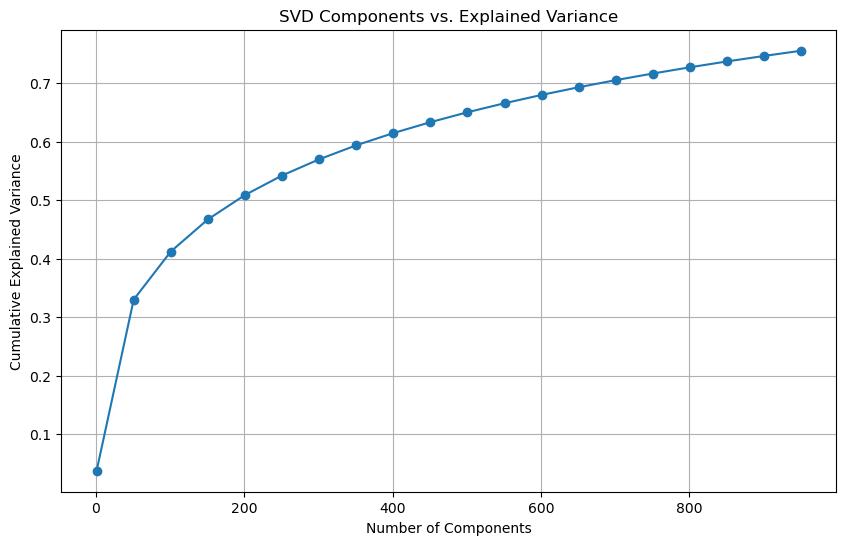

In [657]:
# Plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1000,50), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD Components vs. Explained Variance')
plt.grid(True)
plt.show()

#### around 1000 components out of 14000 is enough for SVD

In [747]:
svd_optimal = TruncatedSVD(n_components=1000, random_state=42)
svd_optimal.fit(cat_tfidf)
category_svd = svd_optimal.transform(cat_tfidf)

In [748]:
category_svd.shape

(15678, 1000)

#### Also apply SVD on the user-rating matrix to reduce dimensionality

In [745]:
# only get use books with categories in them 
cat_matrix = filled_matrix.loc[:, filled_matrix.columns.isin(book_category_clean["Book_ID"])]

In [709]:
item_user_rating_cat = cat_matrix.T
item_user_rating_cat.shape

(13315, 1295)

In [711]:
explained_variances = []
for n in range(1, 1000, 50):
    svd = TruncatedSVD(n_components=n, random_state=42)
    svd.fit(item_user_rating_cat)
    explained_variances.append(np.sum(svd.explained_variance_ratio_))

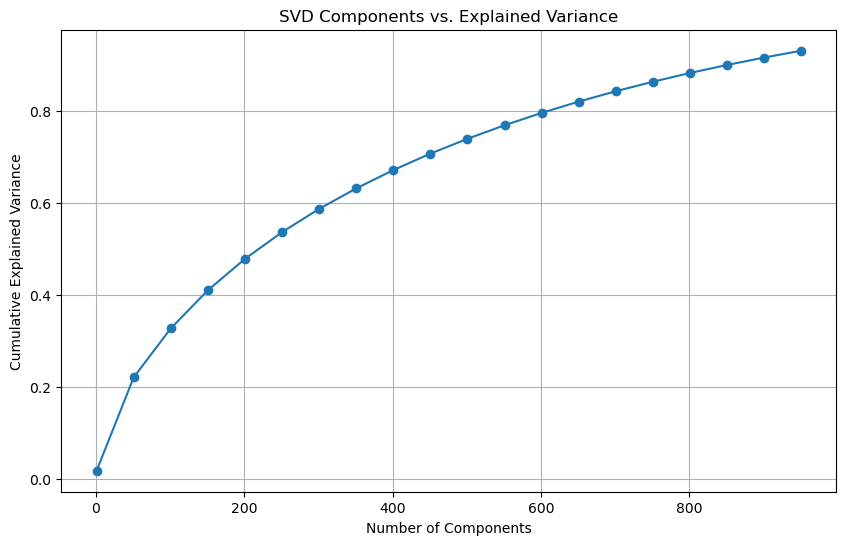

In [712]:
# Plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1000,50), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD Components vs. Explained Variance')
plt.grid(True)
plt.show()

#### Around 600 components out of 1295 is enough for SVD

In [723]:
svd_ratings = TruncatedSVD(n_components=600, random_state=42)
svd_ratings.fit(item_user_rating_cat)
user_rating_svd = svd_ratings.transform(item_user_rating_cat)

In [751]:
# convert svd to a df
cat_svd_df = pd.DataFrame(category_svd, index = book_category_clean["Book_ID"])
user_rating_svd_df = pd.DataFrame(user_rating_svd, index = item_user_rating_cat.index)

In [753]:
# join user ratings and category svd
item_user_cat = pd.concat([user_rating_svd_df, cat_svd_df], axis = 1, join = "inner")

In [755]:
item_user_cat.shape

(13315, 1600)

In [814]:
# create function that compares item similarities 
def similar_category(book_id, data_matrix, book_db, k = 10):
    # book_id, which book(s) they like to find similar recs
    # data_matrix is the item X features matrix (this includes ratings and categories)
    # book_db is used to match titles
    # k is how many books to recommend
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics.pairwise import cosine_similarity

    # standard scale the ratings and categories
    scaler = StandardScaler()
    scaled_matrix = scaler.fit_transform(data_matrix)

    # put this scaled matrix back into a dataframe to preserve index
    data_matrix_scaled = pd.DataFrame(scaled_matrix, index = data_matrix.index, columns = data_matrix.columns)
    # Compute cosine similarity
    cosine_sim = cosine_similarity(data_matrix_scaled)
    # Create df for cosine sims (item x item)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=data_matrix_scaled.index, columns=data_matrix_scaled.index)

    
    combined_sims = pd.Series(dtype = "float64")

    book_sim = cosine_sim_df.loc[book_id]
    for ind in book_id:
        current_sims = book_sim.loc[ind].drop(ind)
        combined_sims = pd.concat([combined_sims, current_sims])

    # after combining sims, there will be duplicate entries for the sims, just keep the max sims for each book then sort
    final_sims = combined_sims.groupby(combined_sims.index).max().sort_values(ascending = False)

    book_rec = final_sims.iloc[:k]
    book_rec_index = book_rec.index

    rec_titles = book_db[book_db["Book_ID"].isin(book_rec_index)]["Book-Title"]

    input_book = book_db[book_db["Book_ID"].isin(book_id)]["Book-Title"]
    print("The input book(s):\n")
    for title in input_book.to_list():
        print(title)
    
    print("------------------------------------------------------------")
    print(f"Top {k} recommendations are the following:\n")
    for title in rec_titles.to_list():
        print(title)
    return

In [816]:
similar_category([80], item_user_cat, merged_book_info, 5)

The input book(s):

Whisper of Evil (Hooper, Kay. Evil Trilogy.)
------------------------------------------------------------
Top 5 recommendations are the following:

Hiding in the Shadows (Shadows Trilogy (Paperback))
Club Dead (Southern Vampire Mysteries)
Last Breath
Shadow Dance
The Inheritor (\Light\)


In [818]:
similar_category([468, 2208, 4149], item_user_cat, merged_book_info, 5)

The input book(s):

Lena (50 State Quarters)
Strange but True
The Protocol
------------------------------------------------------------
Top 5 recommendations are the following:

The Fourth Hand
Positive Match
Saving Jessica
Miracle Baby  (9 Months Later) (Harlequin Super Romances, No 736)
Steffie Can't Come Out to Play


In [820]:
similar_category([137, 416, 642, 872, 2842, 7272], item_user_cat, merged_book_info, 5)

The input book(s):

Tis : A Memoir
The Reader
Jurassic Park
A Thousand Words for Stranger (Daw Book Collectors)
The Lord of the Rings (Movie Art Cover)
The Egg and I
------------------------------------------------------------
Top 5 recommendations are the following:

The Fellowship of the Ring
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Lord of the Rings
The Return of the King (The Lord of the Rings, Part 3)
The Lord of the Rings


# Implement using book description
We can look at user ratings, find their top n books then recommend k similar books to users.

#### Vectorize the description df with CountVectorizer, then apply TfidfTransformer

In [64]:
# remove books without description
books_with_desc = book_description[book_description["Description"] != "No description available"]

In [66]:
books_with_desc.shape

(2748, 2)

In [100]:
books_with_desc.head()

,Book_ID,Description
5,8,Three passengers are dead. Fifty-six are injur...
6,9,"In an Arizona desert, a man wanders in a daze,..."
24,28,"When eleven-year old Shabanu, the daughter of ..."
25,29,Having relented to the ways of her people in P...
31,35,The how of Pooh? The Tao of who? The Tao of Po...


In [623]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer(stop_words = "english")
vec_words = vectorizer.fit_transform(books_with_desc["Description"])

tfidf = TfidfTransformer()
vec_tfidf = tfidf.fit_transform(vec_words)

In [482]:
tfidf_desc = pd.DataFrame(vec_tfidf.toarray(), columns=vectorizer.get_feature_names_out(), index = books_with_desc["Book_ID"])
tfidf_desc.head()

,00,000,05,0l,0s,10,100,101,1023,1030l,...,étonnante,éxito,última,últimas,último,últimos,única,über,überlebens,übertrifft
Book_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a function that does the following
1. look at the top rated books by a user (top n percentile, to account for user rating preference, remove 0 when ranking)
3. for each book find top similar books (make sure to normalize when doing this step)
4. after finding similar books, sort then recommend top k books
5. use book id to reference merged_book_info to get title

In [812]:
def content_similarity(user_scores, data_matrix, book_db, k = 10, n = 0.75):
    # user_scores is pd series of scores 
    # data matrix is the feature matrix
    # book_db is the df that maps book_id and title
    # n is the percentile, default is 75th percentile
    # k is how many books to recommend

    from sklearn.metrics.pairwise import cosine_similarity

    # Compute cosine similarity
    cosine_sim = cosine_similarity(data_matrix)
    
    # Create df for cosine sims (item x item)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=data_matrix.index, columns=data_matrix.index)
    
    filtered_ratings = user_scores[user_scores != 0]
    percentile_n = filtered_ratings[filtered_ratings >= filtered_ratings.quantile(n)]
    top_index = percentile_n.index

    book_sim = cosine_sim_df.loc[top_index]

    # initialize an empty series
    combined_sims = pd.Series(dtype = "float64")

    for ind in top_index:
        current_sims = book_sim.loc[ind].drop(ind)
        combined_sims = pd.concat([combined_sims, current_sims])

    # after combining sims, there will be duplicate entries for the sims, just keep the max sims for each book then sort
    final_sims = combined_sims.groupby(combined_sims.index).max().sort_values(ascending = False)

    book_rec = final_sims.iloc[:k]
    book_rec_index = book_rec.index

    rec_titles = book_db[book_db["Book_ID"].isin(book_rec_index)]["Book-Title"]

    top_rated_titles = book_db[book_db["Book_ID"].isin(top_index)]["Book-Title"]
    print("Top rated books by the user are the following:\n")
    for title in top_rated_titles.to_list():
        print(title)
    
    print("------------------------------------------------------------")
    print(f"Top {k} recommendations for the user are the following:\n")
    for title in rec_titles.to_list():
        print(title)
    return

In [130]:
# create user-item matrix with only books that have description available. 
desc_matrix = filled_matrix.loc[:, filled_matrix.columns.isin(book_desc_tf["Book_ID"])]
desc_matrix.shape

(1295, 2371)

In [128]:
desc_matrix.head()

item,8,9,28,29,35,39,45,54,58,68,...,17277,17278,17287,17294,17303,17305,17319,17320,17344,17351
user,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [522]:
tfidf_desc.head()

,00,000,05,0l,0s,10,100,101,1023,1030l,...,étonnante,éxito,última,últimas,último,últimos,única,über,überlebens,übertrifft
Book_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Test the recommender on some random users

In [822]:
# desc_matrix is where you can get user rating for user_scores
# tfidf_desc is the data_matrix for applying recommendations based on description

content_similarity(desc_matrix.iloc[11,:], tfidf_desc, merged_book_info, 5, 0.8)

Top rated books by the user are the following:

Lena (50 State Quarters)
Strange but True
The Protocol
------------------------------------------------------------
Top 5 recommendations for the user are the following:

The Diary of Ellen Rimbauer: My Life at Rose Red
Love Is the Key
Chasing Redbird
Grab Hands and Run
The Moonlight Man


In [823]:
content_similarity(desc_matrix.iloc[278,:], tf_df, merged_book_info, 5, 0.8)

Top rated books by the user are the following:

Tis : A Memoir
The Reader
Jurassic Park
A Thousand Words for Stranger (Daw Book Collectors)
The Lord of the Rings (Movie Art Cover)
The Egg and I
------------------------------------------------------------
Top 5 recommendations for the user are the following:

The Fellowship of the Ring
The Two Towers (The Lord of the Rings, Part 2)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Lord of the Rings
